### 딥러닝 CNN 프로젝트 보고서 

#### 요가 자세 분류
- 사전 훈련 모델 + 분류기(고용량)
- 싸이클 별 내용 보고

데이터 이미지 확인합니다.

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = './datasets/Yoga/original/'

idg = ImageDataGenerator(rescale=1./255)

generator = idg.flow_from_directory(root, target_size = (150, 150), batch_size=32, class_mode='categorical')
# print(generator.class_indices)

Found 5991 images belonging to 107 classes.


In [3]:
target_name = {v : k for k, v in generator.class_indices.items()}
# print(target_name)

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def show_images(generator, ncols=8):

    random_indices = np.random.choice(len(generator.filepaths), 8, replace=False)
    #print(random_indices)

    target_name = {v : k for k, v in generator.class_indices.items()}
    
    target_names = []
    
    for target in generator.classes:
        target_names.append(target_name[target])

    # print(target_names)
    images = []
    indices= []

    
    for index in random_indices:
        image = cv2.cvtColor(cv2.imread(generator.filepaths[index]), cv2.COLOR_BGR2RGB)
        images.append(image)
        indices.append(index)
    
    fig, axes = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i, index in zip(range(ncols), indices):
        axes[i].imshow(images[i])
        axes[i].axis('off')
        axes[i].set_title(target_names[index])


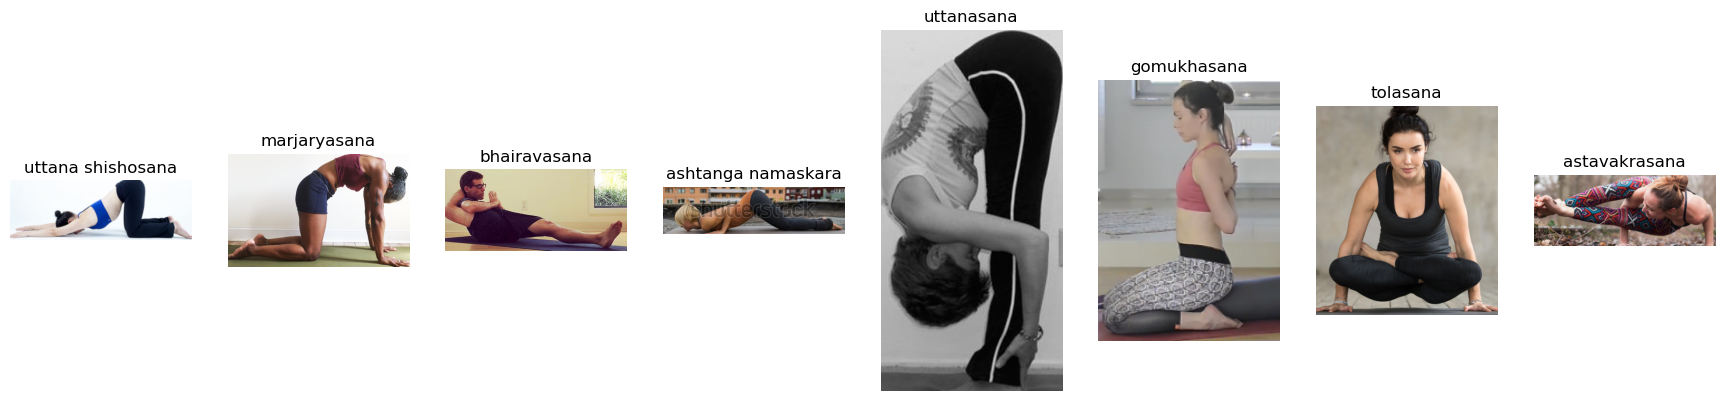

In [5]:
show_images(generator)

---
### Cycle 1
- 사용한 사전훈련 모델 : `Resnet50`
- 사용한 분류기

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation 적용 X
- Learning_rate : default
- 훈련 Epoch : 10 / 10


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.7923</td>
        <td>0.6131</td>
        <td>0.6549</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.6484</td>
        <td>1.5691</td>
        <td>1.3843</td>
    </tr>
</table>

- history 시각화
  
<img src="./images/yoga/cycle1_history.png" width="500px">

- 예측 수행
<img src="./images/yoga/cycle1_prediction.png" width="1200px">

- 임의 예측 수행한 결과, 4개 중에 2개 맞추는 것을 확인했습니다.
- 조금더 정확도를 올리기 위해 Epoch를 20으로 조정합니다.

---
### Cycle 2
- 사용한 사전훈련 모델 : `Resnet50`
- 사용한 분류기

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation 적용 X
- Learning_rate : default
- 훈련 Epoch : 19 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.9311</td>
        <td>0.5328</td>
        <td>0.5474</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.2236</td>
        <td>2.3378</td>
        <td>2.2350</td>
    </tr>
</table>

- history 시각화
  
<img src="./images/yoga/cycle2_history.png" width="500px">

- Early Stopping이 발생했고, Train Accuracy와 Validation, Test 간의 점수차이가 많이 났기에 예측을 수행하지 않았습니다.
- Learning_rate를 1e-5로 조정합니다.

---
### Cycle 3
- 사용한 사전훈련 모델 : `Resnet50`
- 사용한 분류기

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation 적용 X
- Learning_rate : 1e-5
- 훈련 Epoch : 20 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.2391</td>
        <td>0.1929</td>
        <td>----</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>3.4028</td>
        <td>3.9271</td>
        <td>----</td>
    </tr>
</table>

Learning_rate를 1e-5로 조정했을 때, 훈련하는 속도가 너무 낮아 오히려 점수가 낮게 나옴을 알 수 있었습니다.  
Learning_rate를 5e-4로 수치를 조정합니다.

---
### Cycle 4
- 사용한 사전훈련 모델 : `Resnet50`
- 사용한 분류기

<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation 적용 X
- Learning_rate : 5e-4
- 훈련 Epoch : 15 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.9435</td>
        <td>0.5839</td>
        <td>0.5990</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.1973</td>
        <td>2.1181</td>
        <td>1.9288</td>
    </tr>
</table>

- history 시각화
  
<img src="./images/yoga/cycle4_history.png" width="500px">

- 예측 수행
<img src="./images/yoga/cycle4_prediction.png" width="1200px">

- 임의 예측 수행한 결과, 4개 중에 4개를 맞추었지만, 여전히 Train과 Validation & Test 간의 점수 차이가 많이 남을 알 수 있었습니다.
- 이를 조정하기 위해 Albumentation을 적용합니다.

---
### Cycle 5
- 사용한 사전훈련 모델 : `Resnet50`
- 사용한 분류기


<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 24,642,907
- Albumentation 적용 O

<code>
    aug = A.Compose([
        A.ShiftScaleRotate(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.GaussNoise(p=0.5, var_limit=(400, 900)),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
    ])

</code>

- Learning_rate : 5e-4
- 훈련 Epoch : 20 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.7447</td>
        <td>0.5954</td>
        <td>0.6690</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.8601</td>
        <td>1.6137</td>
        <td>1.4335</td>
    </tr>
</table>

- history 시각화
  
<img src="./images/yoga/cycle5_history.png" width="500px">

- 예측 수행
<img src="./images/yoga/cycle5_prediction.png" width="1200px">

- Albumentation을 적용했을 때, Train 점수는 떨어졌지만 Train과 Validation & Test 간의 점수 차이가 줄어들었습니다.
- 임의 예측 수행한 결과, 4개 중에 2개를 맞추었습니다.
- MobileNet으로 변경해서 다시 점수 예측을 수행합니다.

---
### Cycle 6
- 사용한 사전훈련 모델 : `MobileNet`
- 사용한 분류기


<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 2,952,091
- Albumentation 적용 O

<code>
    aug = A.Compose([
        A.ShiftScaleRotate(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.GaussNoise(p=0.5, var_limit=(400, 900)),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
    ])

</code>

- Learning_rate : 5e-4
- 훈련 Epoch : 8 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.4906</td>
        <td>0.1773</td>
        <td>----</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>1.8437</td>
        <td>4.2066</td>
        <td>----</td>
    </tr>
</table>

MobileNet으로 변경하였을 때, 오히려 점수가 매우 낮게 나옴과 동시에, EarlyStopping으로 훈련이 조기 종료가 되었습니다.  
강사님께 자문을 구한결과 효율이 좋은 EfficientNet이 있다는 것을 알고 EfficientNet으로 훈련을 진행합니다.

---
### Cycle 7
- 사용한 사전훈련 모델 : `EfficientNet`
- 사용한 분류기


<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 4,743,678
- Albumentation 적용 O

<code>
    aug = A.Compose([
        A.ShiftScaleRotate(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.GaussNoise(p=0.5, var_limit=(400, 900)),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
    ])

</code>

- Learning_rate : 5e-4
- 훈련 Epoch : 20 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.8959</td>
        <td>0.7205</td>
        <td>0.7300</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>0.3304</td>
        <td>1.4324</td>
        <td>1.2517</td>
    </tr>
</table>

- history 시각화
  
<img src="./images/yoga/cycle7_history.png" width="500px">

- 다중 예측 수행

<img src="./images/yoga/cycle7_prediction.png" width="1200px">


- EfficientNet으로 수행했을 때 Train과 Validaion & Test 점수 차이가 가장 적게 나타났습니다.
- 또한 임의 예측 수행 시 예측 결과 또한 잘 나타났습니다.


- 외부 이미지 예측 수행

<img src="./images/yoga/cycle7_predict_image_pre.png" width="1200px">
<img src="./images/yoga/cycle7_predict_image_from_web.png" width="1200px">

**외부 이미지에 대해 예측을 잘 하는 것을 확인하였습니다.**



---
### Cycle 8
- 사용한 사전훈련 모델 : `VGG16`
- 사용한 분류기


<code>
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    x = Dense(500, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
    output = Dense(107, activation='softmax', name='output')(x)
</code>

- Total params : 15,024,795
- Albumentation 적용 O

<code>
    aug = A.Compose([
        A.ShiftScaleRotate(p=0.5),
        A.HorizontalFlip(p=0.5),
        A.GaussNoise(p=0.5, var_limit=(400, 900)),
        A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0, p=0.5)
    ])

</code>

- Learning_rate : 5e-4
- 훈련 Epoch : 8 / 20


<style>
    table {
        margin-left: 0;
    }
</style>

<table style="margin-left: 0">
    <tr>
        <th></th>
        <th>Train</th>
        <th>Validation</th>
        <th>Test</th>
    </tr>
    <tr>
        <td>Accuracy</td>
        <td>0.0126</td>
        <td>0.0146</td>
        <td>----</td>
    </tr>
    <tr>
        <td>Loss</td>
        <td>4.6584</td>
        <td>4.6538</td>
        <td>----</td>
    </tr>
</table>

VGG16으로 변경하였을 때, Train 점수와 Validation 점수가 낮게 나타남과 동시에 Early Stopping이 발생했습니다.

---
### Score Per Cycles

<img src="./images/yoga/Cycle_bar_plot.png" width="1200px">

### 정리
- 각 Cycle 별 다른 모델과 점수를 비교해보았을 때, Cycle 7에서 가장 안정적으로  
  Train, Validation, Test Accuracy 점수가 안정적으로 나타났고 loss 값도 안정적이게 낮게 나타났습니다.

### 🚩느낀 점

1. 모델 비교 및 성능 차이:
- 이번 프로젝트에서 Resnet, Mobilenet, VGG16, EfficientNet의 사전 훈련 모델을 이용하여 다양한 실험을 수행했습니다. 이 과정에서 모델마다 성능 차이가 확연하게 드러났습니다.
- 특히 Mobilenet과 VGG16은 같은 데이터 증강 기법(albumentation)과 학습률(learning rate), 분류기를 사용했음에도 불구하고 점수가 매우 낮게 나왔습니다. 이는 저용량 모델들이 고해상도 이미지나 복잡한 데이터를 처리하는 데 한계가 있음을 느꼇습니다.

2. 효율성의 중요성:
- EfficientNet을 사용했을 때 가장 안정적인 성능을 보였습니다.  
  Train, Validation, Test 세트에서의 Accuracy와 Loss가 가장 균형있고 낮게 나타났습니다.
- 이는 EfficientNet이 최신 모델로서 높은 효율성과 성능을 제공한다는 것을 다시 한 번 확인하게 해주었습니다.

3. 이미지 데이터의 특성:
- 고용량 및 고해상도 이미지 데이터를 훈련시킬 때는 Resnet과 EfficientNet 모델이 가장 효과적이라는 결론에 도달했습니다.
- 이는 이들 모델이 복잡한 패턴과 고차원 특징을 잘 학습할 수 있기 때문으로 보입니다.

4. 알고리즘 선택의 중요성:
- 다양한 모델을 시도해봄으로써 특정 데이터셋에 가장 적합한 알고리즘을 선택하는 것이 중요하다는 것을 다시 한 번 깨달았습니다.
- 효율성이 좋은 모델을 선택함으로써 더 나은 성능을 달성할 수 있음을 확인했습니다.

5. 자문과 피드백의 가치:
- 강사님께 자문을 구하고 피드백을 반영하여 EfficientNet을 시도해본 것이 큰 도움이 되었습니다. 이는 프로젝트 진행 시 외부의 전문가 의견을 듣고 반영하는 것이 매우 중요하다는 점을 깨달았습니다.
